In [4]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from helper.database_connection_helper import get_collection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


collection = get_collection()

In [5]:
collection_filter = {
    'configuration': 'Africa',
    'instrument': 'Pufferfish'
}

000bc7ea-8918-420c-bd13-30e1a6e8dd00
00fa1d39-bdd9-45e3-81f6-6f52a1ca57b3
02498907-b394-4b7c-a0ab-068692746591
03733bc2-dc08-4ce0-8553-f2f0f26323f8
038e3e8f-0693-43ea-abaa-6357c078f87a
0fa9dc7d-bc3f-4105-86ae-0e6e77e9c846
15e645e2-0a59-4dd0-8e07-6e29b5dba7fe
1629474b-19bc-43ed-9d30-0f09aa755509
181bbc41-cb1c-408a-b21f-7724298afcca
1b3738f0-07e6-4607-b606-416547364bca
21838205-0ddd-426f-8c84-e0d00b93fa34
2250b4ae-e779-4d3a-a1fd-5806746a9d66
24dd5ce2-3e1b-46a9-8732-2c3e82ec3db0
28198a76-e52a-456e-ba74-3acc3d85df1a
28cd2906-cda8-49f5-b343-8c6ff2733f44
32c4b0ae-645a-40e8-a204-9b8b8b451e75
372254e8-5be2-48eb-8f37-f090022b4375
3afc93a7-b675-413f-9c42-67223c106cdd
4ca42ba5-0ed9-49bd-8a9f-907d4bde6684
54c3200b-f53a-4572-b4a5-116514ea286d
5a2156aa-fb13-4eee-bbf6-39c9578dce24
5ee52639-4f87-4e81-82fc-9e2f11f94a97
5f962f20-7911-483e-bb23-433d5d059f53
5fe9a7af-78d0-4eed-98c4-aa6cc91ad869
60f67428-91bd-452b-9bda-cde64b74e44e
619b97ab-ddcd-4eb6-8a09-2d4dec026350
66a57ccf-53f6-4276-8c8b-c5160a62ce97
6

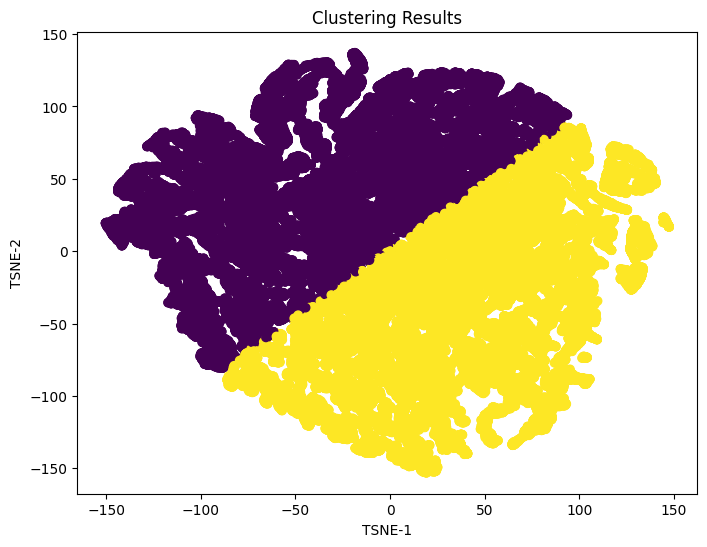

In [6]:
documents = collection.find(collection_filter)
    
all_data = []

for doc in documents:
    print(doc['_id'])
    
    # Hinzufügen der Daten aus jedem Dokument zur Liste
    for defect_channel, distance, magnetization, timestamp in zip(doc['defect_channel'], doc['distance'], doc['magnetization'], doc['timestamp']):
        all_data.append({
            'defect_channel': defect_channel,
            'distance': distance,
            'magnetization': magnetization,
            'timestamp': timestamp
        })
        
df = pd.DataFrame(all_data)

if 'timestamp' in df.columns:
    df = df.drop(columns=['timestamp'])
    
# Datenzauberei
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pipeline = make_pipeline(imputer, scaler)
df_preprocessed = pipeline.fit_transform(df)

print("Datenzauberei fertig")

n_samples = df_preprocessed.shape[0]
perplexity_value = min(30, max(5, int(n_samples / 3)))  

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_results = tsne.fit_transform(df_preprocessed)

print("TSNE fertig")

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

print("Clustering fertig")

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis')
plt.title("Clustering Results")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()